

# Preprocesamiento de datos

## Introducción

En esta sesión vamos a ver los aspectos básicos y herramientas que nos va a permitir desarrollar técnicas de preprocesamiento de datos en `python`. 

<div class='alert-warning'>
  <strong>Librerías necesarias:</strong> `pandas`, `math`, `numpy`, `missingno`, `seaborn`, `sklearn`, `imbalanced-learn` y `ROSE`.
</div>


In [1]:
import math
import pandas as pd
import numpy as np


## Valores ausentes

Al igual que en la mayoría de los lenguajes de programación, en `python` también podemos encontrar valores especiales que indican alguna excepción respecto a los valores normales. En lo que se refiere a los valores ausentes, pandas indica los valores ausentes principalmente por `NaN` (del inglés, not a number) o por el símbolo `None`. En `python`, el `NaN` se puede especificar de dos formas con `math.nan` o con `numpy.NaN`.

Ejemplo de datos ausentes. Dado el siguiente dataframe:

In [2]:
df = pd.DataFrame({"a": [None, 1, 2], "b": [3, np.NaN, 1]})  
print(df)

     a    b
0  NaN  3.0
1  1.0  NaN
2  2.0  1.0


Podemos ver que `python` convierte el `None` a `NaN`, uniformizando la representación de los datos ausentes. 

¿Qué pasaría si le añadimos dos columnas, de tipo entero y real, pero sin ningún valor?

In [3]:
df['c'] = pd.Series(dtype='int32')
df['d'] = pd.Series(dtype='float32')
print(df)

     a    b   c   d
0  NaN  3.0 NaN NaN
1  1.0  NaN NaN NaN
2  2.0  1.0 NaN NaN


Otros valores especiales como una cadena de caracteres vacía o un infinito (`math.inf` o `numpy.Inf`) no se consideran valores perdidos:

In [4]:
df['e'] = ''
df['f'] = np.Inf
print(df)

     a    b   c   d e    f
0  NaN  3.0 NaN NaN    inf
1  1.0  NaN NaN NaN    inf
2  2.0  1.0 NaN NaN    inf


Esto último lo podemos comprobar mediante el método `isnull()`:

In [5]:
df.isnull()

,a,b,c,d,e,f
0,True,False,True,True,False,False
1,False,True,True,True,False,False
2,False,False,True,True,False,False


Un último valor especial es el NA, que se especifica en python mediante `pd.NA`. Éste es un valor experimental (a partir de pandas 1.4.0), por lo que muchos algoritmos de aprendizaje no pueden gestionarlo. Se recomienda no usarlo, por ahora. 

In [6]:
df['g'] = pd.Series([10, pd.NA, 12])
print(df)

     a    b   c   d e    f     g
0  NaN  3.0 NaN NaN    inf    10
1  1.0  NaN NaN NaN    inf  <NA>
2  2.0  1.0 NaN NaN    inf    12


In [7]:
df = pd.DataFrame({"a": [0, pd.NA, 2], "b": [0, 3, 2]})

Algunas curiosidades de los números especiales: 

In [8]:
np.NaN == math.nan  # Igual que en otros lenguajes de programación, p.e. R

False

In [9]:
np.NaN == np.NaN

False

In [10]:
pd.NA == pd.NA  # Igual que en otros lenguajes de programación, p.e. R

<NA>

Teniendo en cuenta las anteriores definiciones, intenta descubrir el resultado de las siguientes operaciones y porqué se produce dicho resultado:

- `pd.NA+1`
- `sum([pd.NA, 1, 2])`
- `len([pd.NA, 1, 2, 3])`
- `3 == pd.NA`
- `sum([2,3,np.NaN,4])`
- `math.nan == None`
- `None == None`
- `2 * np.Inf`
- `p.Inf - 10e+10`
- `np.Inf + np.Inf`
- `math.exp(np.Inf)`
- `math.exp(math.nan)`

## Lectura de datos

`python` es capaz de leer y procesar datos en multitud de formatos. Aquí nos vamos a centrar en datos en forma de tabla y en formato texto (la mayoría de las aplicaciones pueden exportar a este formato). A groso modo podemos decir que un dataset es técnicamente correcto cuando:

- está almacenado en un `Dataframe` con los nombres adecuados para las columnas (atributos), y 
- cada columna es del tipo de dato acorde con el domino de la variable que representa. Por ejemplo, los datos categóricos deben estar definidos como `category` y los números como `float` o `int`.


<div class='alert alert-danger'>
En tareas de clasificación, hay que asegurarse de que la variable que indica la clase esté definida como `category`. Esto se debe a que hay casos en que las clases se etiquetan con números $(0, 1, ..)$. Al importar esta información, \textsf{python} entiende que la variable es numérica, y cuando intentemos crear modelos de clasificación, puede que genere modelos de regresión. 
</div>


<div class='alert alert-info'>
<strong>Ejercicio:</strong> 
  
Abre con algún editor el fichero `hepatitis.csv` que podrás encontrar en el campus virtual.

1. ¿Cuáles crees que deben ser los tipos asociados a cada columna?
2. ¿Existen valores desconocidos? ¿Cómo están representados?
3. ¿Qué información crees que falta?
</div>


Las función más básicas que ofrece `pandas` para leer datos en formato texto son:

- `read_csv()` para valores separados por comas con el punto para separar decimales         
- `read_table()` para valores separados por tabuladores u otros delimitadores  

Todas estas funciones aceptan entre otros los siguientes parámetros:

- `header` para indicar si la primera fila contiene los nombres de las columnas
- `names` para indicar en un array de strings con los nombres de las columnas
- `na_values` para indicar con un array cómo se representan los valores ausentes
- `delimiter` para indicar el caracter con el que se separan las celdas  
- `decimal` para indicar el caracter de punto decimal      
- `quotechar` para indicar el caracter que indica una cadena de texto


<div class='alert-warning'>
Cuando importes unos datos con algunas de estas funciones, examínalos primero con funciones como 
`head()` o `info()`.
</div>


<div class='alert alert-info'>
<strong>Ejercicio:</strong> 
Lee el fichero `hepatitis.csv` y guárdalo en la variable `df`. Examina su cabecera. ¿Qué sucede? 
</div>

In [11]:
df = pd.read_csv('./hepatitis.csv')
df.head()

,30,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,1.0,85,18,4.0,*,0.11,1.1
0,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
1,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
2,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
3,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95,28,4.0,75,0,1


Como puedes ver, el fichero no tiene cabecera, por lo que habría que cargarlo con la opción `header=None`

In [12]:
df = pd.read_csv('./hepatitis.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Podemos obtener más detalle de nuestro conjunto de datos a través de la función `info`:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       155 non-null    int64 
 1   1       155 non-null    int64 
 2   2       155 non-null    object
 3   3       155 non-null    int64 
 4   4       155 non-null    object
 5   5       155 non-null    object
 6   6       155 non-null    object
 7   7       155 non-null    object
 8   8       155 non-null    object
 9   9       155 non-null    object
 10  10      155 non-null    object
 11  11      155 non-null    object
 12  12      155 non-null    object
 13  13      155 non-null    object
 14  14      155 non-null    object
 15  15      155 non-null    object
 16  16      155 non-null    object
 17  17      155 non-null    object
 18  18      155 non-null    int64 
 19  19      155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


Una vez cargado el fichero correctamente, el siguiente paso consiste en nombrar de forma correcta sus columnas. Este paso nos lo podemos saltar en el caso que el conjunto de datos incluya dichos nombres en la primera línea y colocando el parámetro `header=0` al llamar a la función `read_csv`. En nuestro caso, el nombre de cada una de las columnas aparece como información adicional y deberían nombrarse como: EDAD, SEXO, ESTEROIDES, ANTIVIRALES, FATIGA, MALAISE, ANOREXIA, HIGgrande, HIGfirme, BAZOpalpa, ARANIASvac., ASCITIS, VARICES, BILIRRUBINA, FOSFATOalc, SGOT, ALBUMINA, PROTIME, HISTIOLOGIA y PRONOSTICO. Para que las columnas de nuestro conjunto de datos adopten estos nombres debemos ejecutar lo siguiente:

In [14]:
colnames = ["EDAD", "SEXO", "ESTEROIDES", "ANTIVIRALES","FATIGA", "MALAISE", 
            "ANOREXIA", "HIGgrande", "HIGfirme", "BAZOpalpa", "ARANIASvac", 
            "ASCITIS", "VARICES", "BILIRRUBINA", "FOSFATOalc", "SGOT", 
            "ALBUMINA", "PROTIME", "HISTIOLOGIA", "PRONOSTICO"]
df.columns = colnames
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Este paso podría hacerse directamente al llamar la función `read_csv` indicando las columnas en el parámetro `names`:

In [15]:
df = pd.read_csv('./hepatitis.csv', header=None, names=colnames)
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Podemos obtener más detalle de nuestro conjunto de datos a través de la función `info`:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EDAD         155 non-null    int64 
 1   SEXO         155 non-null    int64 
 2   ESTEROIDES   155 non-null    object
 3   ANTIVIRALES  155 non-null    int64 
 4   FATIGA       155 non-null    object
 5   MALAISE      155 non-null    object
 6   ANOREXIA     155 non-null    object
 7   HIGgrande    155 non-null    object
 8   HIGfirme     155 non-null    object
 9   BAZOpalpa    155 non-null    object
 10  ARANIASvac   155 non-null    object
 11  ASCITIS      155 non-null    object
 12  VARICES      155 non-null    object
 13  BILIRRUBINA  155 non-null    object
 14  FOSFATOalc   155 non-null    object
 15  SGOT         155 non-null    object
 16  ALBUMINA     155 non-null    object
 17  PROTIME      155 non-null    object
 18  HISTIOLOGIA  155 non-null    int64 
 19  PRONOSTICO   155 non-null    

El último paso sería sustituir los `*` que representan los valores ausentes en el fichero que acabamos de cargar. Si lo queremos hacer de forma manual, podríamos ejecutar la función `replace` indicando el valor a reemplazar y su valor sustituto:

In [17]:
df = df.replace('*', math.nan)
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,NaN,0,1
3,31,0,NaN,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200,4.0,NaN,0,1


Otra opción sería indicarlo directamente durante la carga del fichero:

In [18]:
df = pd.read_csv('./hepatitis.csv', header=None, names=colnames, na_values='*')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    int64  
 2   ESTEROIDES   154 non-null    float64
 3   ANTIVIRALES  155 non-null    int64  
 4   FATIGA       154 non-null    float64
 5   MALAISE      154 non-null    float64
 6   ANOREXIA     154 non-null    float64
 7   HIGgrande    145 non-null    float64
 8   HIGfirme     144 non-null    float64
 9   BAZOpalpa    150 non-null    float64
 10  ARANIASvac   150 non-null    float64
 11  ASCITIS      150 non-null    float64
 12  VARICES      150 non-null    float64
 13  BILIRRUBINA  149 non-null    float64
 14  FOSFATOalc   126 non-null    float64
 15  SGOT         151 non-null    float64
 16  ALBUMINA     139 non-null    float64
 17  PROTIME      88 non-null     float64
 18  HISTIOLOGIA  155 non-null    int64  
 19  PRONOSTI

## Conversión de tipos

Una vez interpretados de forma correcta los valores ausentes y haberle dado nombre a las columnas. El siguiente paso en el procesamiento de datos consiste en definir los tipos de datos adecuados para cada columna. Esto lo podemos hacer mediante las funciones `astype` de `python`. Por ejemplo, para convertir la variable `PROTIME` a variable entera, sólo deberíamos ejecutar el siguiente comando:

In [20]:
df['PROTIME'] = df['PROTIME'].astype('Int64')   # Int64 es un tipo especial de entero que soporta el NaN 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    int64  
 2   ESTEROIDES   154 non-null    float64
 3   ANTIVIRALES  155 non-null    int64  
 4   FATIGA       154 non-null    float64
 5   MALAISE      154 non-null    float64
 6   ANOREXIA     154 non-null    float64
 7   HIGgrande    145 non-null    float64
 8   HIGfirme     144 non-null    float64
 9   BAZOpalpa    150 non-null    float64
 10  ARANIASvac   150 non-null    float64
 11  ASCITIS      150 non-null    float64
 12  VARICES      150 non-null    float64
 13  BILIRRUBINA  149 non-null    float64
 14  FOSFATOalc   126 non-null    float64
 15  SGOT         151 non-null    float64
 16  ALBUMINA     139 non-null    float64
 17  PROTIME      88 non-null     Int64  
 18  HISTIOLOGIA  155 non-null    int64  
 19  PRONOSTI

Se podría hacer lo mismo con atributos de otros tipos. Por ejemplo, el atributo ANTIVIRALES es de tipo lógico, indicados por 0s y 1s: 

In [21]:
df['ANTIVIRALES'] = df['ANTIVIRALES'].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    int64  
 2   ESTEROIDES   154 non-null    float64
 3   ANTIVIRALES  155 non-null    boolean
 4   FATIGA       154 non-null    float64
 5   MALAISE      154 non-null    float64
 6   ANOREXIA     154 non-null    float64
 7   HIGgrande    145 non-null    float64
 8   HIGfirme     144 non-null    float64
 9   BAZOpalpa    150 non-null    float64
 10  ARANIASvac   150 non-null    float64
 11  ASCITIS      150 non-null    float64
 12  VARICES      150 non-null    float64
 13  BILIRRUBINA  149 non-null    float64
 14  FOSFATOalc   126 non-null    float64
 15  SGOT         151 non-null    float64
 16  ALBUMINA     139 non-null    float64
 17  PROTIME      88 non-null     Int64  
 18  HISTIOLOGIA  155 non-null    int64  
 19  PRONOSTI

<div class='alert alert-info'>
<strong>Ejercicio:</strong> 
    
- Convierte los atributos ESTEROIDES, ANOREXIA, VARICES, HISTIOLOGIA, HIGgrande, HIGfirme, BAZOpalpa, FATIGA, ARANIASvac, ASCITIS, MALAISE a valores lógicos. 

- Convierte FOSFATOalc y SGOT a enteros.  
    
¿Qué pasa con los NaN de esas columnas?
    
</div>

In [22]:
df['FOSFATOalc'] = df['FOSFATOalc'].astype('Int64')
df['SGOT'] = df['SGOT'].astype('Int64')
df['ESTEROIDES'] = df['ESTEROIDES'].astype('boolean')
df['ANOREXIA'] = df['ANOREXIA'].astype('boolean')
df['VARICES'] = df['VARICES'].astype('boolean')
df['HISTIOLOGIA'] = df['HISTIOLOGIA'].astype('boolean')
df['ANOREXIA'] = df['ANOREXIA'].astype('boolean')
df['HIGgrande'] = df['HIGgrande'].astype('boolean')
df['HIGfirme'] = df['HIGfirme'].astype('boolean')
df['BAZOpalpa'] = df['BAZOpalpa'].astype('boolean')
df['FATIGA'] = df['FATIGA'].astype('boolean')
df['ARANIASvac'] = df['ARANIASvac'].astype('boolean')
df['ASCITIS'] = df['ASCITIS'].astype('boolean')
df['MALAISE'] = df['MALAISE'].astype('boolean')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,1
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,1
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,1
3,31,0,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,1
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,1


Llegados a este punto, nos queda por tratar de forma correcta los atributos originales. En este caso obsérvese que el atributo PRONOSTICO está definido como entero y, por lo tanto, si se intentasen aplicar técnicas de clasificación, o bien no se podrán realizar o se construiría un modelo de regresión al estar definido dicho atributo como entero. Para solucionar este problema, bastaría con indicar que es una categoría a través de la función `astype()`. 

Sin embargo, en estos casos sería más interesante que los elementos de la enumeración fuesen más informativos. En nuestro caso, sería deseable cambiar el 0 y el 1 por FALLECE Y VIVE, respectivamente. Esta recodificación de etiquetas se puede hacer utilizando la función `mask()` del dataframe de la siguiente forma:

In [23]:
df['PRONOSTICO'].mask(df['PRONOSTICO'] == 0, 'FALLECE', inplace=True)
df['PRONOSTICO'].mask(df['PRONOSTICO'] == 1, 'VIVE', inplace=True)

C:\Users\acull\AppData\Local\Temp\ipykernel_7916\2345304590.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FALLECE' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['PRONOSTICO'].mask(df['PRONOSTICO'] == 0, 'FALLECE', inplace=True)


Una vez hecho este cambio, ya podríamos indicar que la columna es una categoría:

In [24]:
df['PRONOSTICO'] = df['PRONOSTICO'].astype('category')

<div class='alert alert-info'>
  <strong>Ejercicio:</strong>
  
- Transforma el atributo SEXO en una categoría y asigna al 1 la etiqueta MASCULINO y al 0 la etiqueta FEMENINO.

</div>

In [25]:
df['SEXO'].mask(df['SEXO'] == 0, 'FEMENINO', inplace=True)
df['SEXO'].mask(df['SEXO'] == 1, 'MASCULINO', inplace=True)
df['SEXO'] = df['SEXO'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    int64   
 1   SEXO         155 non-null    category
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALAISE      154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGgrande    145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIASvac   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRRUBINA  149 non-null    float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMINA     139 non-null    float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTIOLOGIA  155 non-null    b

C:\Users\acull\AppData\Local\Temp\ipykernel_7916\3339405181.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FEMENINO' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['SEXO'].mask(df['SEXO'] == 0, 'FEMENINO', inplace=True)


## Análisis de valores ausentes

Antes de empezar a imputar los valores ausentes habría que estudiar la distribución de los mismo. En gran medida, ya podemos ver al ejecutar la función `info()` los valores ausentes de cada una de las columnas.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    int64   
 1   SEXO         155 non-null    category
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALAISE      154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGgrande    145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIASvac   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRRUBINA  149 non-null    float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMINA     139 non-null    float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTIOLOGIA  155 non-null    b

Pero también podríamos verlo utilizando la función `isnull()`:

In [27]:
df.isnull().any()

EDAD           False
SEXO           False
ESTEROIDES      True
ANTIVIRALES    False
FATIGA          True
MALAISE         True
ANOREXIA        True
HIGgrande       True
HIGfirme        True
BAZOpalpa       True
ARANIASvac      True
ASCITIS         True
VARICES         True
BILIRRUBINA     True
FOSFATOalc      True
SGOT            True
ALBUMINA        True
PROTIME         True
HISTIOLOGIA    False
PRONOSTICO     False
dtype: bool

En este caso, con el `any()` se agrupa por columna (sin él nos devolvería el resultado por celda). Si utilizamos el agregador `sum()` obtendríamos la suma de valores ausentes por columna:

In [28]:
df.isnull().sum()

EDAD            0
SEXO            0
ESTEROIDES      1
ANTIVIRALES     0
FATIGA          1
MALAISE         1
ANOREXIA        1
HIGgrande      10
HIGfirme       11
BAZOpalpa       5
ARANIASvac      5
ASCITIS         5
VARICES         5
BILIRRUBINA     6
FOSFATOalc     29
SGOT            4
ALBUMINA       16
PROTIME        67
HISTIOLOGIA     0
PRONOSTICO      0
dtype: int64

Y si lo volvemos a sumar, obtendríamos el total de valores ausentes de nuestro conjunto de datos:

In [29]:
df.isnull().sum().sum()

167

Podemos representar gráficamente los resultados anteriores a través de la librería `missingno`. El primer paso sería instalarla a través del siguiente comando:

In [30]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import missingno as mi

La función bar() nos permitiría ver la distribución de datos ausentes en un diagrama de barras agrupado por las variables: 

<Axes: >

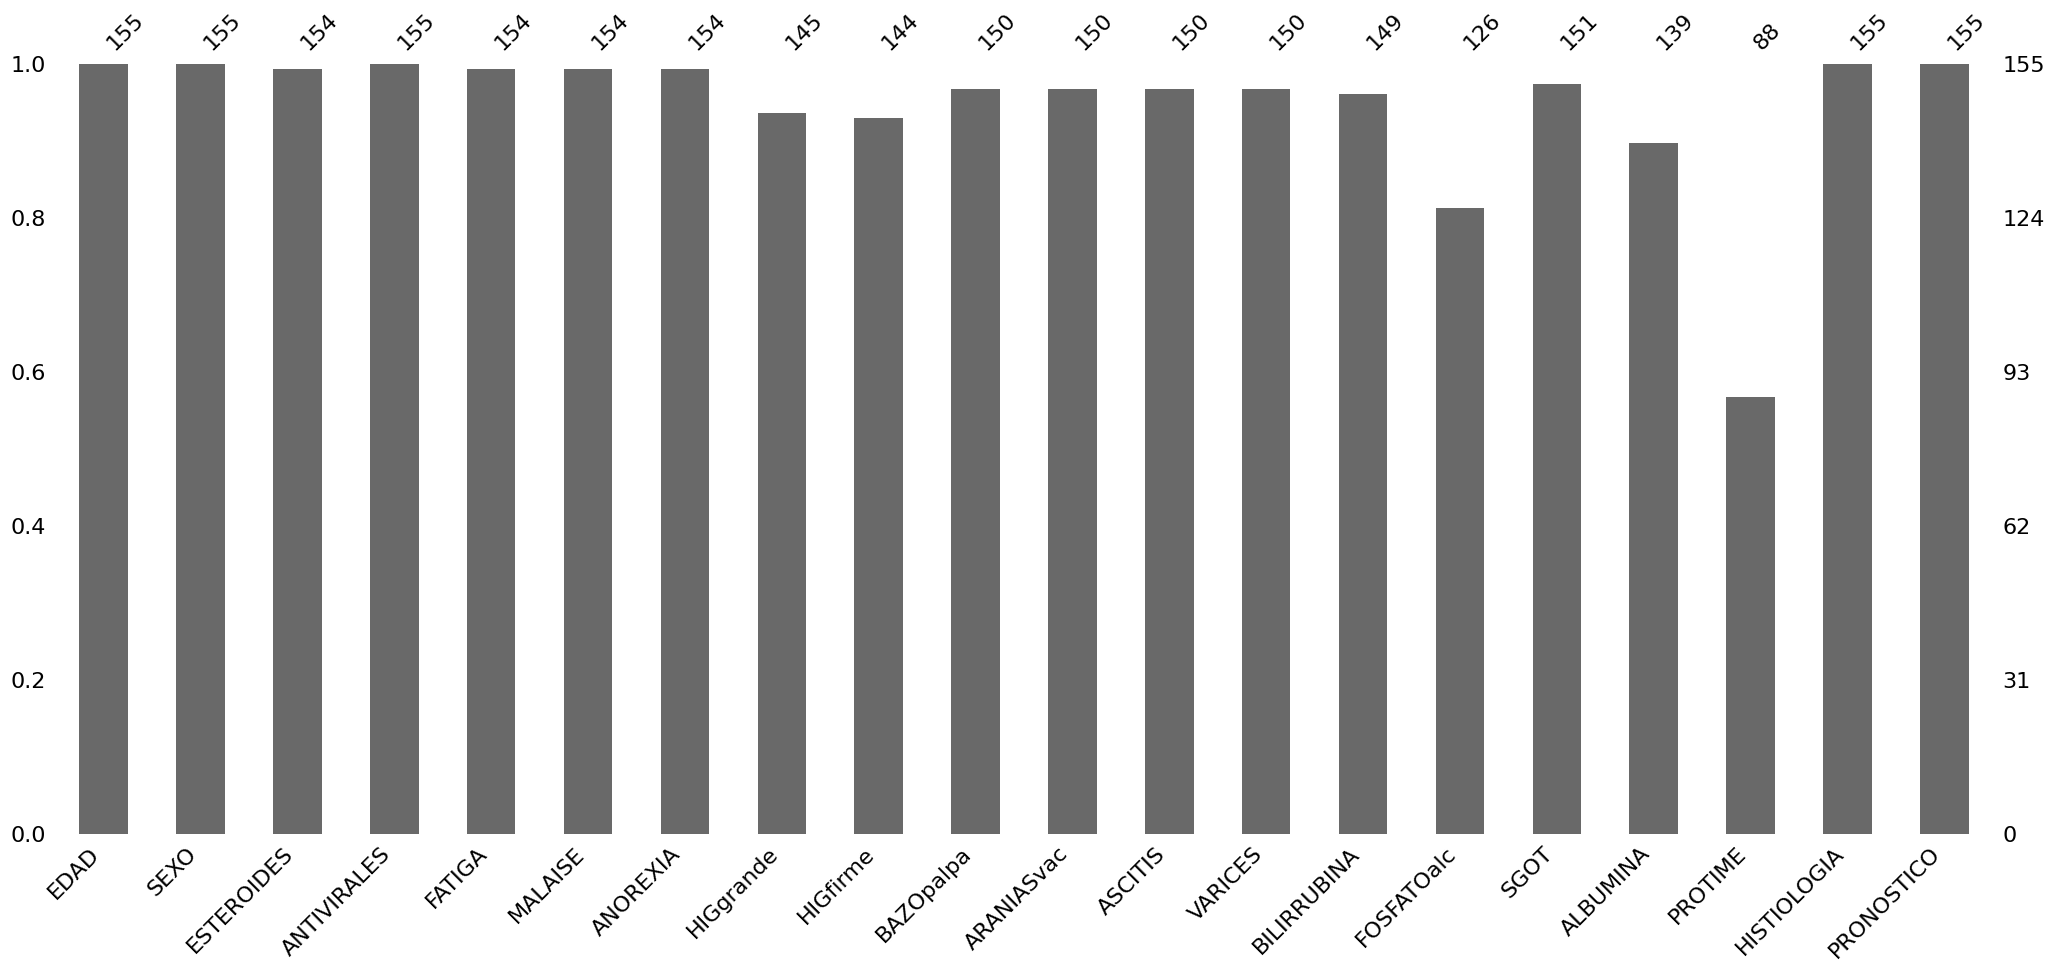

In [32]:
mi.bar(df)

Otra visualización es en forma matricial, donde cada fila representa uno de los objetos, y los valores ausentes se representan en blanco. 

<Axes: >

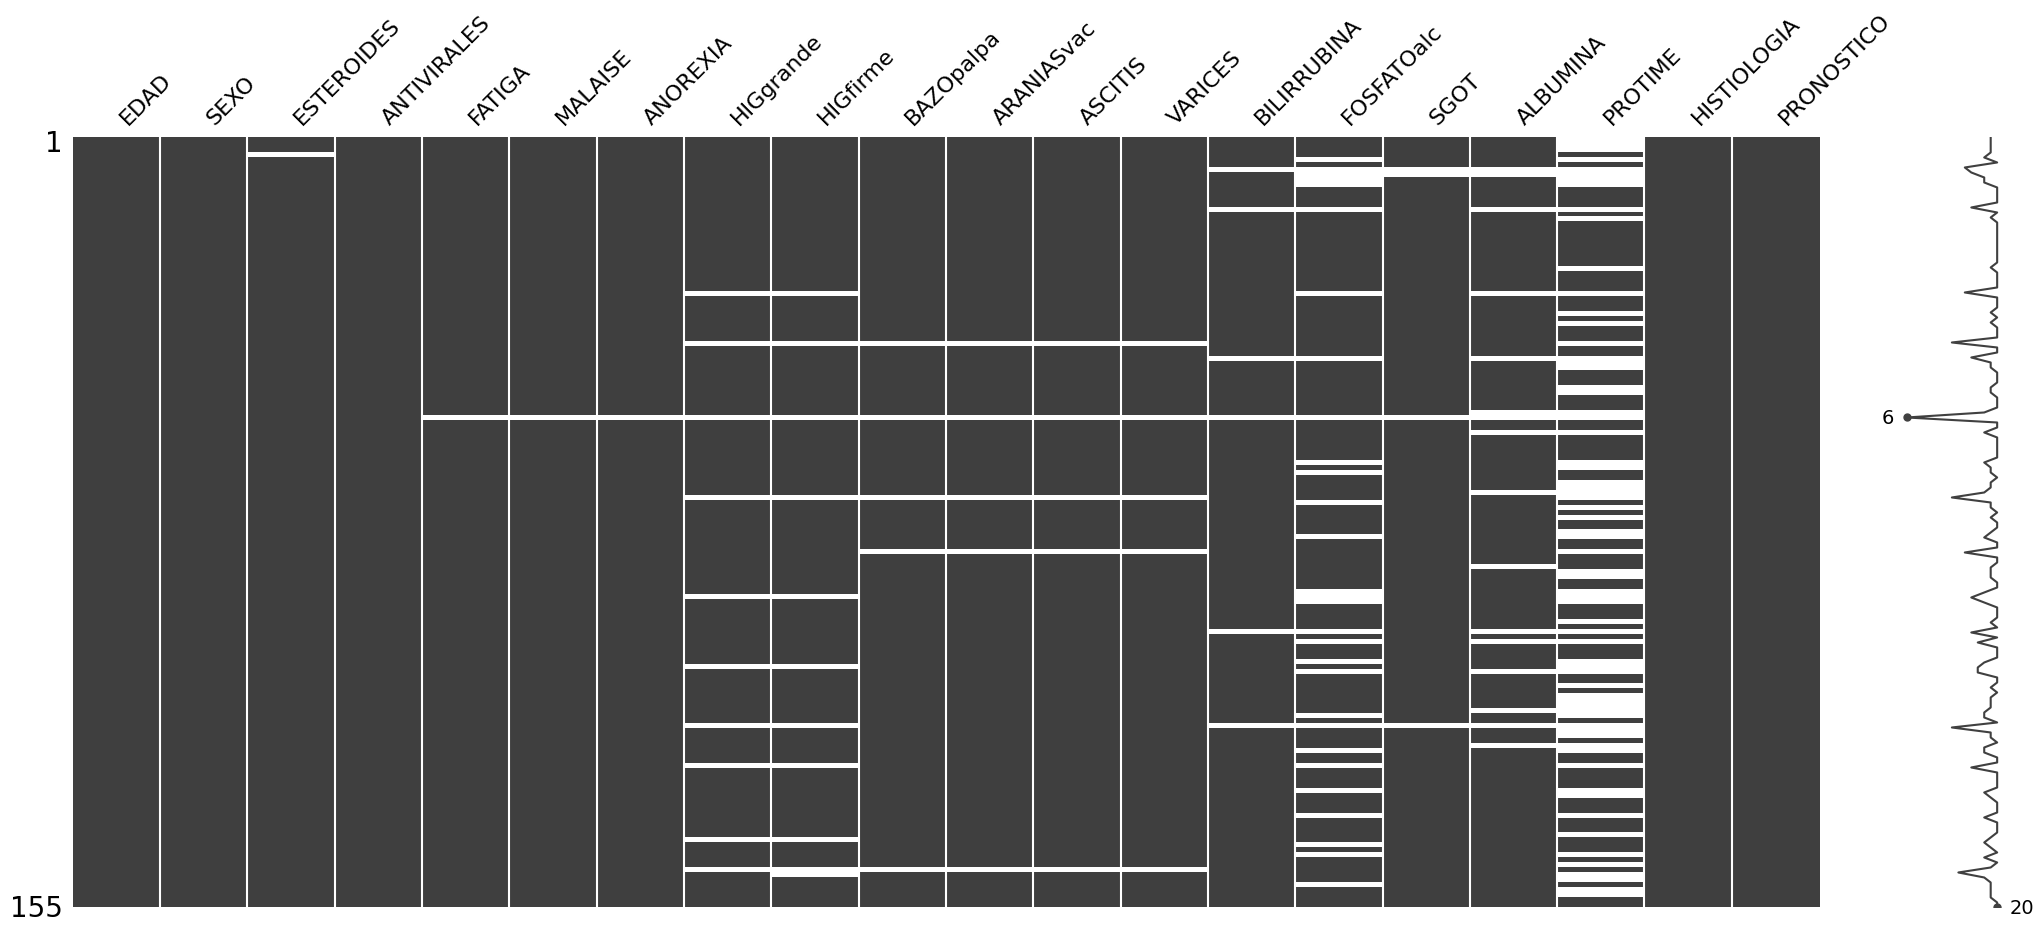

In [33]:
mi.matrix(df)

En la parte derecha del gráfico hay una línea que va desde 0, a la izquierda, hasta el número total de columnas. Cuando una fila tiene un valor en cada columna, la línea estará en la posición máxima a la derecha. A medida que los valores faltantes comienzan a aumentar dentro de esa fila, la línea se moverá hacia la izquierda. En este caso, el máximo de valores ausentes está en la línea 56:

In [34]:
df.iloc[[56]]

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
56,34,FEMENINO,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,False,VIVE


Los mapas de calor proporcionan otra forma de representar esta información permitiendo, además, identificar correlaciones de la nulidad entre cada una de las diferentes columnas. En otras palabras, se puede utilizar para identificar si existe una relación en la presencia de valores nulos entre cada una de las columnas.

Valores próximos a 1 positivo indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.

Los valores próximos a 1 negativo indican que la presencia de valores nulos en una columna está anticorrelacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando hay valores nulos en una columna, hay valores de datos presentes en la otra columna, y viceversa.

Los valores cercanos a 0, indican que hay poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

El mapa de calor se puede generar a través del siguiente comando: 

<Axes: >

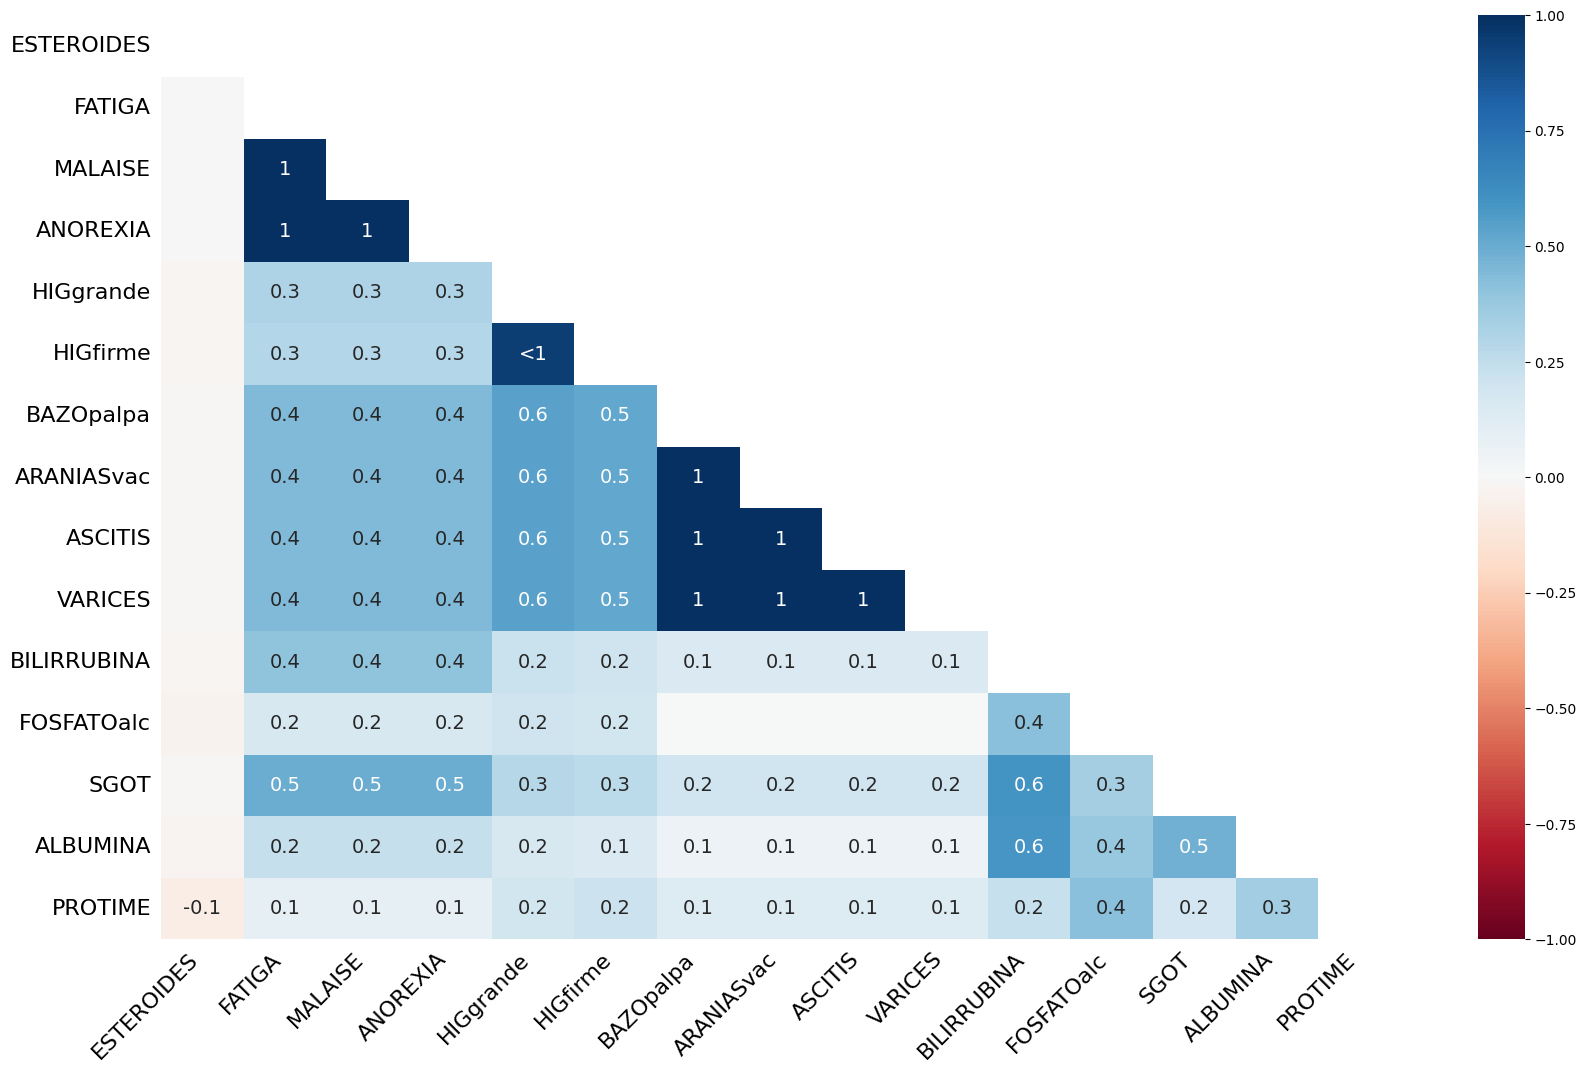

In [35]:
mi.heatmap(df)

La librería `seaborn` ofrece algunas opciones sencillas de visualización. En concreto, los mapas de calor seaborn muestran dónde se encuentran los datos espacialmente dentro del dataframe. El siguiente código produce un mapa de calor seaborn:

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

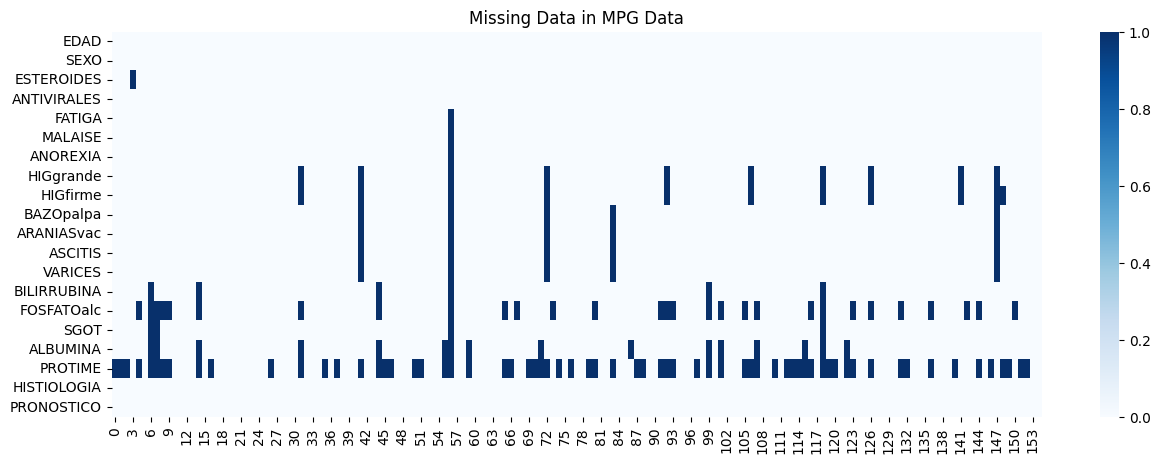

In [37]:
plt.subplots(figsize=(15,5))  
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in MPG Data")
plt.show()


## Imputación de valores ausente

Como ya se ha visto en teoría el proceso de imputación consiste en la estimación de posibles valores para aquello campos con valores ausentes. Existen muchos métodos de imputación y ninguno destaca sobre los demás. El método elegido dependerá de muchos factores como el tipo de datos (no todos los métodos de imputación admiten valores booleanos o factores), el tipo de problema, rango de la variable, etc. 

### Imputación con el SimpleInputer

En `python` existen multitud de paquetes que ofrecen funciones para implementar distintas técnicas de imputación, aquí vamos a utilizar la librería `sklearn.impute`.

Para más información consultar el siguiente enlace: https://scikit-learn.org/stable/modules/impute.html

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    int64   
 1   SEXO         155 non-null    category
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALAISE      154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGgrande    145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIASvac   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRRUBINA  149 non-null    float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMINA     139 non-null    float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTIOLOGIA  155 non-null    b

A continuación se muestra cómo sería la imputación con variables reales. En este caso, se puede seleccionar como estrategia de imputación la media, la mediana, el valor más frecuente o una constante:

In [39]:
from sklearn.impute import SimpleImputer

# Mean Imputation
df_imp = df.copy()
si = SimpleImputer(strategy='mean')
df_imp['BILIRRUBINA'] = si.fit_transform(df_imp['BILIRRUBINA'].values.reshape(-1,1))
df_imp['ALBUMINA'] = si.fit_transform(df_imp['ALBUMINA'].values.reshape(-1,1))
df_imp.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


Probemos imputar la BILIRRUBINA con la mediana y veamos las diferencias: 

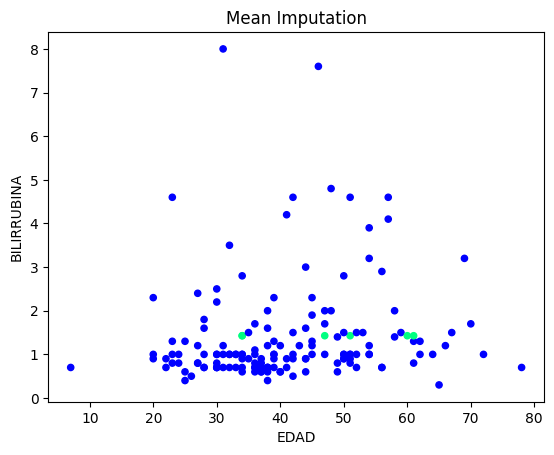

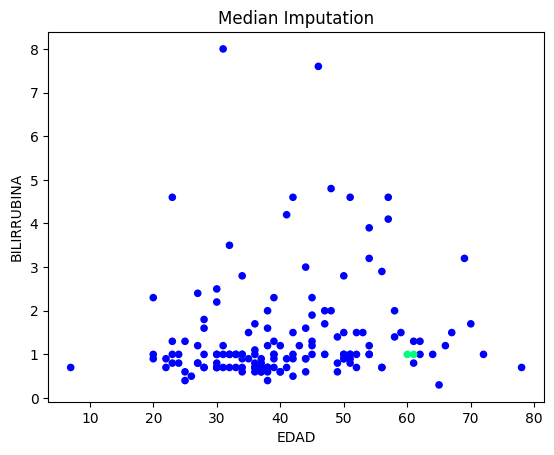

In [40]:
si = SimpleImputer(strategy='median')
df_imp2 = df.copy()
df_imp2['BILIRRUBINA'] = si.fit_transform(df_imp2['BILIRRUBINA'].values.reshape(-1,1))

null_values = df['BILIRRUBINA'].isnull()
fig = plt.Figure()
fig = df_imp.plot(x="EDAD", y='BILIRRUBINA', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp2.plot(x="EDAD", y='BILIRRUBINA', kind='scatter', c=null_values, cmap='winter', title='Median Imputation', colorbar=False)

<div class='alert alert-info'>
  <strong>Ejercicio:</strong>
  
- Imputa la variable ALBUMNIA utilizando la mediana.
</div>

Sin embargo, cuando la imputación se realiza a variables no-reales, solo se puede imputar por el valor más frecuente (moda) o con una constante:

In [41]:
pip install -U scikit-learn  # Es necesario actualizar el sklearn para dar soporte a los pd.NA

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_imp['SGOT'] = si.fit_transform(df_imp['SGOT'].values.reshape(-1,1))
df_imp['FOSFATOalc'] = si.fit_transform(df_imp['FOSFATOalc'].values.reshape(-1,1))
df_imp['PROTIME'] = si.fit_transform(df_imp['PROTIME'].values.reshape(-1,1))
df_imp.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,100.0,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,100.0,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,100.0,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,100.0,False,VIVE


Lo mismo sucede con los tipos de datos lógicos:

In [43]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_imp['ESTEROIDES'] = si.fit_transform(df_imp['ESTEROIDES'].values.reshape(-1,1))
df_imp['ANTIVIRALES'] = si.fit_transform(df_imp['ANTIVIRALES'].values.reshape(-1,1))
df_imp['FATIGA'] = si.fit_transform(df_imp['FATIGA'].values.reshape(-1,1))
df_imp['MALAISE'] = si.fit_transform(df_imp['MALAISE'].values.reshape(-1,1))
df_imp['ANOREXIA'] = si.fit_transform(df_imp['ANOREXIA'].values.reshape(-1,1))
df_imp['HIGgrande'] = si.fit_transform(df_imp['HIGgrande'].values.reshape(-1,1))
df_imp['HIGfirme'] = si.fit_transform(df_imp['HIGfirme'].values.reshape(-1,1))
df_imp['BAZOpalpa'] = si.fit_transform(df_imp['BAZOpalpa'].values.reshape(-1,1))
df_imp['ARANIASvac'] = si.fit_transform(df_imp['ARANIASvac'].values.reshape(-1,1))
df_imp['ASCITIS'] = si.fit_transform(df_imp['ASCITIS'].values.reshape(-1,1))
df_imp['VARICES'] = si.fit_transform(df_imp['VARICES'].values.reshape(-1,1))
df_imp.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,100.0,False,VIVE
1,50,FEMENINO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,100.0,False,VIVE
2,78,FEMENINO,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,100.0,False,VIVE
3,31,FEMENINO,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,False,VIVE
4,34,FEMENINO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,200.0,4.0,100.0,False,VIVE


Y con las variables categóricas: 

In [44]:
df_imp['SEXO'].values.reshape(-1,1)

[['MASCULINO'], ['FEMENINO'], ['FEMENINO'], ['FEMENINO'], ['FEMENINO'], ..., ['FEMENINO'], ['FEMENINO'], ['FEMENINO'], ['MASCULINO'], ['FEMENINO']]
Length: 155
Categories (2, object): ['FEMENINO', 'MASCULINO']

In [45]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
imputed_data = si.fit_transform(df_imp['SEXO'].values.reshape(-1, 1))
df_imp['SEXO'] = imputed_data.ravel()  # Convierte el resultado a una forma adecuada

# Imputar y asignar para 'PRONOSTICO'
imputed_data = si.fit_transform(df_imp['PRONOSTICO'].values.reshape(-1, 1))
df_imp['PRONOSTICO'] = imputed_data.ravel()  # Convierte el resultado a una forma adecuada

df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    object 
 2   ESTEROIDES   155 non-null    float64
 3   ANTIVIRALES  155 non-null    float64
 4   FATIGA       155 non-null    float64
 5   MALAISE      155 non-null    float64
 6   ANOREXIA     155 non-null    float64
 7   HIGgrande    155 non-null    float64
 8   HIGfirme     155 non-null    float64
 9   BAZOpalpa    155 non-null    float64
 10  ARANIASvac   155 non-null    float64
 11  ASCITIS      155 non-null    float64
 12  VARICES      155 non-null    float64
 13  BILIRRUBINA  155 non-null    float64
 14  FOSFATOalc   155 non-null    float64
 15  SGOT         155 non-null    float64
 16  ALBUMINA     155 non-null    float64
 17  PROTIME      155 non-null    float64
 18  HISTIOLOGIA  155 non-null    boolean
 19  PRONOSTI

In [46]:
df_imp.isnull().sum().sum()

0

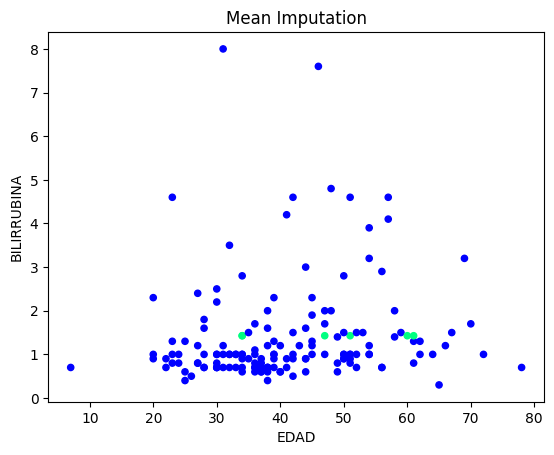

In [47]:
fig = plt.Figure()
null_values = df['BILIRRUBINA'].isnull()
fig = df_imp.plot(x="EDAD", y='BILIRRUBINA', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

### Imputación con KNN

Ahora vamos a imputar los valores ausentes a través de otro método, en este caso los k vecinos más cercanos (KNN). Por defecto, este imputador utiliza la una extensión de la distancia euclídea con soporte para valores NaN para medir la distancia entre datos. Para cada valor ausente, su imputación se realiza tomando los k vecinos más cercanos que tienen un valor para la característica.  

Para más información consultar el siguiente enlace: https://scikit-learn.org/stable/modules/impute.html

In [48]:
from sklearn.impute import KNNImputer

# Mean Imputation
df_imp3 = df.copy()

knni = KNNImputer(n_neighbors=2, weights="uniform")
df_imp3['BILIRRUBINA'] = knni.fit_transform(df_imp['BILIRRUBINA'].values.reshape(-1,1))
df_imp3.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


### Multivariate Imputation by Chained Equation — MICE

Este algoritmo es uno de los más usados. Primero calcula la media de cada columna donde haya un valor ausente y usa el valor medio como marcador. A partir de ahí ejecuta una serie de modelos de regresión (ecuaciones encadenadas) para imputar cada valor ausente de forma secuencial.

Para más información consultar el siguiente enlace: https://scikit-learn.org/stable/modules/impute.html

In [49]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['BILIRRUBINA','ALBUMINA'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
df_mice_imputed.head()

,BILIRRUBINA,ALBUMINA
0,1.0,4.0
1,0.9,3.5
2,0.7,4.0
3,0.7,4.0
4,1.0,4.0



## Clases desbalanceadas 

En este apartado vamos a analizar cómo aplicar técnicas de muestreo para equilibrar el número de instancias entre las distintas clases en un problema con clases desbalanceadas. Vamos aplicar las técnicas analizadas en clase: submuestreo (down-sampling), sobremuestreo (up-sumpling) y `SMOTE`. 

Podemos ver que la clase `PRONOSTICO` está claramente desbalanceada hacia las personas que superan la enfermedad:

In [51]:
print(df['PRONOSTICO'].value_counts())

PRONOSTICO
VIVE       123
FALLECE     32
Name: count, dtype: int64


Primero, creemos dos conjuntos con los datos de la clase `PRONOSTICO` por separado, uno con las personas que viven y otra con las que mueren: 

In [52]:
viven = df[df['PRONOSTICO'] == "VIVE"]
mueren  = df[df['PRONOSTICO'] == "FALLECE"]
print(viven.shape)
print(mueren.shape)

(123, 20)
(32, 20)


Podemos balancear el conjunto de datos haciendo un submuestreo a través de la función `resample` de `sklearn.utils`:

In [53]:
from sklearn.utils import resample

viven_downsample = resample(viven, replace=True, n_samples=len(mueren), random_state=42)

print(viven_downsample.shape)

(32, 20)


Para generar el conjunto de datos balanceado simplemente concatenamos:

In [54]:
data_downsampled = pd.concat([viven_downsample, mueren])

Se puede hacer un sobremuestreo de una forma similar:

In [55]:
mueren_upsample = resample(mueren, replace=True, n_samples=len(viven), random_state=42)

print(mueren_upsample.shape)

(123, 20)


Nuevamente, concatenamos para obtener el conjunto de datos completo: 

In [56]:
data_upsampled = pd.concat([viven, mueren_upsample])

Para utilizar `SMOTE`, primero instalamos la librería `imbalanced-learn`:

In [57]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

Eliminamos la variable `SEXO`, ya que smote no soporta valores categóricos:

In [59]:
X = df.filter(["EDAD", "ESTEROIDES", "ANTIVIRALES","FATIGA", "MALAISE", 
            "ANOREXIA", "HIGgrande", "HIGfirme", "BAZOpalpa", "ARANIASvac", 
            "ASCITIS", "VARICES", "BILIRRUBINA", "FOSFATOalc", "SGOT", 
            "ALBUMINA", "PROTIME", "HISTIOLOGIA"], axis=1).copy()
y = df.filter(['PRONOSTICO'], axis=1).copy()

Creamos la instancia de `SMOTE` y transformamos el dataset. Dado que `SMOTE` tampoco soporta valores de tipo `NA` o `NaN` creamos un pipeline en el que primero aplicamos el `SimpleImputer` de `sklearn` y `SMOTE` a continuación:

In [60]:
# transform the dataset
smote = SMOTE()
# Es necesario este pipeline para dar soporte a los NaN. Por defecto smote no los soporta.
smote_enn = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
A, b = smote_enn.fit_resample(X, y)
print(A.shape)
print(b.shape)

(134, 18)
(134, 1)


## Normalización y estandarización de los datos

Muchos algoritmos de aprendizaje automático funcionan mejor cuando las variables numéricas de entrada se escalan a un rango estándar.

Esto incluye algoritmos que utilizan una suma ponderada de la entrada, como la regresión lineal, y algoritmos que utilizan medidas de distancia, como k-vecinos más cercanos.

Las dos técnicas más populares para escalar datos numéricos antes de modelarlos son la normalización y la estandarización. La normalización escala cada variable de entrada por separado al intervalo 0-1, que es el intervalo para valores de coma flotante donde tenemos la mayor precisión. La estandarización escala cada variable de entrada por separado restando la media (llamado centrado) y dividiendo por la desviación estándar para cambiar la distribución y tener una media de cero y una desviación estándar de uno.

En esta práctica, utilizaremos `sklearn` tanto para la normalización como para la estandarización.

La normalización consiste en reescalar los datos del intervalo original para que todos los valores se encuentren dentro del nuevo intervalo de 0 y 1. Para ello, es necesario conocer los valores mínimos y máximos observables. Se pueden normalizar los datos utilizando el objeto `MinMaxScaler`, que recibe el conjunto de datos a normalizar y devuelve los datos escalados:

In [61]:
from sklearn.preprocessing import MinMaxScaler


# transofrm data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(df_imp['BILIRRUBINA'].values.reshape(-1,1))
np.set_printoptions(precision=3)
print(rescaledX[0:6,:])

[[0.091]
 [0.078]
 [0.052]
 [0.052]
 [0.091]
 [0.078]]


La estandarización de un conjunto de datos consiste en reescalar la distribución de los valores de forma que la media de los valores observados sea 0 y la desviación típica sea 1. Esto puede considerarse como restar el valor medio o centrar los datos.

Este proceso supone que sus observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y una desviación estándar bien definidas. Sin embargo, se puede estandarizar los datos si esta expectativa no se cumple, pero los resultados pueden no ser fiables.

El objeto `StandardScaler` permite realizar este procedimiento. Al igual que el min-max, recibe el conjunto de datos a estandarizar y devuelve los datos estandarizados:

In [62]:
from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler().fit(df_imp['BILIRRUBINA'].values.reshape(-1,1))
rescaledX = scaler.transform(df_imp['BILIRRUBINA'].values.reshape(-1,1))

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:6,:])

[[-0.361]
 [-0.445]
 [-0.614]
 [-0.614]
 [-0.361]
 [-0.445]]


## Discretización

La discretización permite convertir valores numéricos en nominales ordenados. Este proceso se puede realizar utilizando la librería `sklearn`. Los valores de la variable se agrupan en intervalos discretos y a cada intervalo se le asigna un número entero único de forma que se mantenga la relación ordinal entre los intervalos.

El uso de intervalos suele denominarse binning o k-bins, donde k se refiere al número de grupos a los que se asigna una variable numérica.

La asignación proporciona una clasificación de alto orden de los valores que puede suavizar las relaciones entre las observaciones. La transformación puede aplicarse a cada variable numérica de entrada en el conjunto de datos de entrenamiento y, a continuación, proporcionarse como entrada a un modelo de aprendizaje automático para aprender una tarea de modelado predictivo.

Se pueden utilizar distintos métodos para agrupar los valores en k intervalos discretos:
- Uniforme: Cada recipiente tiene la misma anchura en el intervalo de valores posibles para la variable.
- Cuantil: Cada intervalo tiene el mismo número de valores, divididos según percentiles.
- Clústering: Se identifican grupos y se asignan ejemplos a cada grupo.

La discretización se realiza a través de la clase `KBinsDiscretizer`. El parámetro `strategy` controla la forma de dividir la variable de entrada, y puede tomar los valores `uniform`, `quantile`, o `kmeans`.

In [63]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(df_imp['EDAD'].values.reshape(-1,1))
# summarize first few rows
print(data_trans[:10, :])

[[3.]
 [6.]
 [9.]
 [3.]
 [3.]
 [3.]
 [6.]
 [2.]
 [4.]
 [3.]]


c:\Users\acull\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
